# PYTHON k-MEANS CLUSTERING DEMO

#### TRAINING DATASET

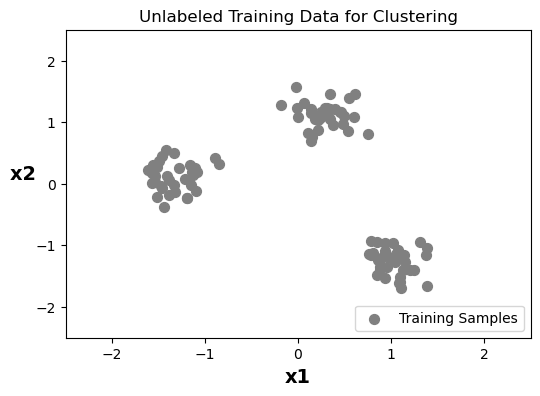

In [13]:
# Create Unlabeled Training Data
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.30, random_state=0)

# Standardize Features X 
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X)

# Plot Training Data
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Unlabeled Training Data for Clustering')
plt.scatter(X_train[:,0], X_train[:,1], color='#808080', marker='o', s=50, alpha=1.0, label='Training Samples')
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.show()

### k-MEANS CLUSTERING

#### A Single Clustering Solution

 
Cluster Centroids
[[ 0.288575    1.11703401]
 [ 1.03184338 -1.26215595]
 [-1.32916308  0.11127243]]
 
Cluster Labels
[1 0 1 0 0 0 2 2 1 0 0 0 1 0 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 2 0 1 1 0 2 2 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 2 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 0 0 1
 1 0 0 0 2 1 0 0 1 0 1 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]
 
Number of Iterations until Convergence
2
 
Sum of Squared Euclidian Distances (Cost Function)
8.330405669235903


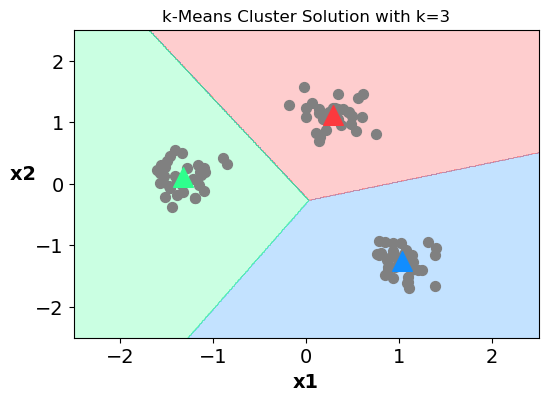

In [14]:
from sklearn.cluster import KMeans

# Fit Model
model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=123)

model.fit(X_train)

# Print Information on Cluster Solution
print(' ')
print('Cluster Centroids')
print(model.cluster_centers_)
print(' ')
print('Cluster Labels')
print(model.labels_)
print(' ')
print('Number of Iterations until Convergence')
print(model.n_iter_)
print(' ')
print('Sum of Squared Euclidian Distances (Cost Function)')
print(model.inertia_)

# Create Meshgrid of x1, x2 Values
import numpy as np
x1 = np.arange(-3, 3, 0.01)
x2 = np.arange(-3, 3, 0.01)
xx1, xx2 = np.meshgrid(x1, x2)

# Evaluate Cluster Solution on Grid
Z = model.predict(np.c_[xx1.flatten(), xx2.flatten()]).reshape(xx1.shape)

# Plot Cluster Solution
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#118DFF', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('k-Means Cluster Solution with k=3')

plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)

plt.scatter(X_train[:,0], X_train[:,1], color='#808080', marker='o', s=50, alpha=1.0, label='Training Samples')

plt.scatter(model.cluster_centers_[0,0], model.cluster_centers_[0,1], color='#FC393E', marker='^', s=200, alpha=1.0)
plt.scatter(model.cluster_centers_[1,0], model.cluster_centers_[1,1], color='#118DFF', marker='^', s=200, alpha=1.0)
plt.scatter(model.cluster_centers_[2,0], model.cluster_centers_[2,1], color='#2FFF8D', marker='^', s=200, alpha=1.0)

plt.xlabel('x1',   fontsize=14, weight='bold')
plt.ylabel('x2  ', fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

plt.show()


#### "CLASSIFYING" NEW SAMPLES

Model predicts New Samples as: [1]
 
Centroid of that Cluster: [[ 1.03184338 -1.26215595]]


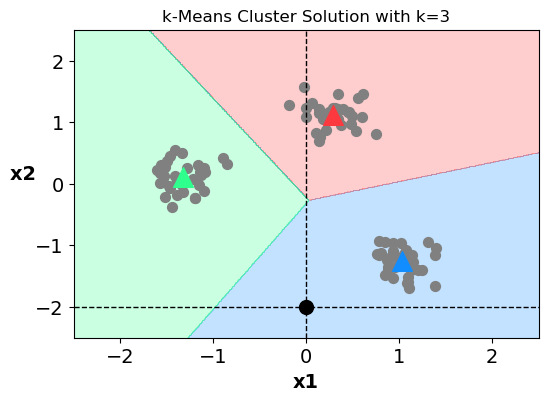

In [15]:
X_new = [[0, -2]]

print('Model predicts New Samples as:', model.predict(X_new))
print(' ')
print('Centroid of that Cluster:', model.cluster_centers_[model.predict(X_new)])


%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#118DFF', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('k-Means Cluster Solution with k=3')

plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)

plt.scatter(X_train[:,0], X_train[:,1], color='#808080', marker='o', s=50, alpha=1.0, label='Training Samples')

plt.scatter(model.cluster_centers_[0,0], model.cluster_centers_[0,1], color='#FC393E', marker='^', s=200, alpha=1.0)
plt.scatter(model.cluster_centers_[1,0], model.cluster_centers_[1,1], color='#118DFF', marker='^', s=200, alpha=1.0)
plt.scatter(model.cluster_centers_[2,0], model.cluster_centers_[2,1], color='#2FFF8D', marker='^', s=200, alpha=1.0)

plt.scatter(X_new[0][0], X_new[0][1], color='#000000', marker='o', s=100, alpha=1.0)

plt.axhline(X_new[0][1], color='#000000', ls='--', lw=1)
plt.axvline(X_new[0][0], color='#000000', ls='--', lw=1)

plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

plt.show()

#### Searching for Optimal Value for k

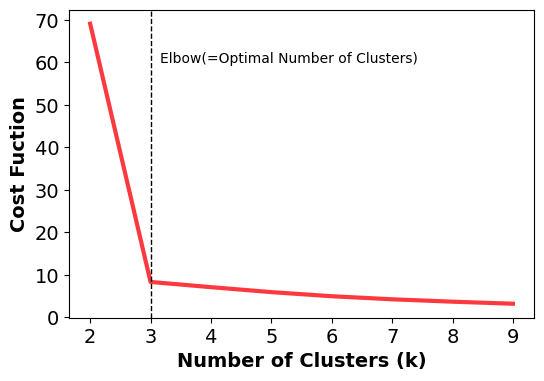

In [16]:
from sklearn.cluster import KMeans

list_k = range(2, 10)
list_costs = []

# Fit Models with different values for k
for value in list_k:
    
    # Fit Model
    model = KMeans(n_clusters=value, init='k-means++', n_init=10, max_iter=300, random_state=123)
    
    model.fit(X_train)
    
    # Append Cost of Model to <list_costs>
    list_costs.append(model.inertia_)

# Plot Cost against k
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))

plt.plot(list_k, list_costs, color='#FC393E', linewidth=3, linestyle='-', alpha=1.0)
plt.axvline(3, color='#000000', linewidth=1, linestyle='--', alpha=1.0)
plt.text(3.15, 60, 'Elbow(=Optimal Number of Clusters)')

plt.xlabel("Number of Clusters (k)",   fontsize=14, weight='bold')
plt.ylabel("Cost Fuction", fontsize=14, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()